In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
## Read Data
df = pd.read_csv('Scout for Defensive Lineman 2023_2024.csv')
df = df.replace('-', 0)
df

,Name,Plays,Pos,Team,5-9 Tech %,Impact Plays,Havoc Plays,Pressures,Sacks,Run Stuffs,...,DOTk,YATA,Stops,Stop %,Tot Tackles,Solo Tackles,Tot Tack %,Solo Tack %,Assisted Tackles,Ast Tack %
0,Aaron Faumui,599,DL,UVA,2.0%,29,32,8,0,9,...,1.2,3.2,12,32.4%,39,10,6.5%,1.7%,29,4.8%
1,Aaron Lewis,636,DL,RUT,77.0%,34,30,15,3.5,4,...,3.0,4.5,4,10.0%,49,7,7.7%,1.1%,42,6.6%
2,Adin Huntington,675,DL,ULM,29.0%,60,80,25,7,8,...,1.0,4.2,11,19.6%,63,22,9.3%,3.3%,41,6.1%
3,Ahmed Hassanein,725,DL,BSU,83.6%,45,53,32,11,3,...,0.6,4.3,12,21.4%,56,20,7.7%,2.8%,36,5.0%
4,Alex Gubner,758,DL,MONT,0.1%,55,65,15,2.5,10,...,1.4,3.1,14,31.1%,45,13,5.9%,1.7%,32,4.2%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Tyqaze Leggs,536,DL,MRSH,9.3%,38,40,9,3,4,...,-0.4,4.3,6,20.7%,36,8,6.7%,1.5%,28,5.2%
177,Yahya Black,608,DL,IOWA,1.3%,37,20,8,3.5,1,...,2.1,2.6,17,31.5%,59,15,9.7%,2.5%,44,7.2%
178,Zeek Biggers,584,DL,GT,0.2%,28,27,4,0,5,...,2.2,3.4,14,32.6%,48,10,8.2%,1.7%,38,6.5%
179,Zion Nason,539,DL,LT,1.1%,26,26,7,1.5,4,...,1.9,6.2,7,23.3%,36,9,6.7%,1.7%,27,5.0%


Ruben vs Everyone (Avg) Stats [USE THE PERCENTAGES]

In [28]:
## Identifying Rueben's Stats
rueben = df[df['Name'] == 'Rueben Bain, Jr.']

In [17]:
## Idenfifying averages for some stats
impact_plays = df['Impact Plays']
avg_impact_plays = impact_plays.mean()
avg_impact_plays = round(avg_impact_plays)

havoc_plays = df['Havoc Plays']
avg_havoc_plays = havoc_plays.mean()
avg_havoc_plays = round(avg_havoc_plays)

tot_tackles = df['Tot Tackles']
avg_tot_tackles = tot_tackles.mean()
avg_tot_tackles = round(tot_tackles)

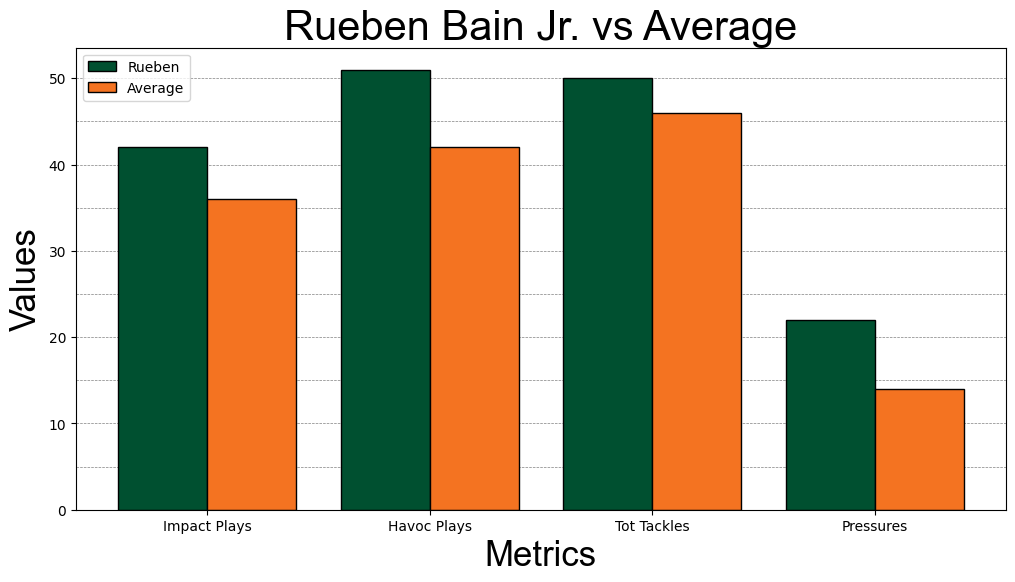

In [71]:
labels = ['Impact Plays', 'Havoc Plays', 'Tot Tackles', 'Pressures']
rueben_values = np.array([42, 51, 50, 22])
avg_values = np.array([36, 42, 46, 14])

plt.figure(figsize=(12,6))

## Labeling and arranging
width = 0.4
x = np.arange(len(labels))

plt.xlabel('Metrics', fontdict={'fontname' : 'Arial', 'fontsize': 25})
plt.ylabel('Values', fontdict={'fontname' : 'Arial', 'fontsize': 25})
plt.title('Rueben Bain Jr. vs Average', fontdict={'fontname' : 'Arial', 'fontsize': 30})
plt.xticks(x, labels)

## Plotting
plt.bar(x - width/2, rueben_values, color='#005030', edgecolor='black', width=width, label='Rueben') 
plt.bar(x + width/2, avg_values, color='#F47321', edgecolor='black', width=width, label='Average')

## Grid Lines
for y in np.arange(0, max(max(rueben_values), max(avg_values)), 5):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5, zorder=0)

## Putting Legend on the top left
plt.legend(loc=2)

plt.show()

In [77]:
scaler = MinMaxScaler()
walker = df[df['Name'] == 'Deone Walker']
murphy = df[df['Name'] == 'Gabriel Murphy']
gillotte = df[df['Name'] == 'Ashton Gillotte']

In [96]:
## Pressures
list = df['Pressures'].tolist()
## Adding Players Pressure Stat Manually, It should pop up as the last point of data
list.append(22)
numpy_list = np.array(list)
numpy_list_2d = numpy_list.reshape(-1, 1)
scaled = scaler.fit_transform(numpy_list_2d)
## Getting the last point of data (the one manually added)
scaled[-1]

array([0.55263158])

In [103]:
## Sacks
list = df['Sacks'].tolist()
## Adding Players Pressure Stat Manually, It should pop up as the last point of data
list.append(9)
numpy_list = np.array(list)
numpy_list_2d = numpy_list.reshape(-1, 1)
scaled = scaler.fit_transform(numpy_list_2d)
## Getting the last point of data (the one manually added)
scaled[-1]

array([0.54545455])

In [107]:
## TTP
list = df['Time to Pressure'].tolist()
## Adding Players Pressure Stat Manually, It should pop up as the last point of data
list.append(3.2)
numpy_list = np.array(list)
numpy_list_2d = numpy_list.reshape(-1, 1)
scaled = scaler.fit_transform(numpy_list_2d)
## Getting the last point of data (the one manually added)
scaled[-1]

array([0.30555556])

In [113]:
## Disrupts
list = df['Run Disrupts'].tolist()
## Adding Players Pressure Stat Manually, It should pop up as the last point of data
list.append(37)
numpy_list = np.array(list)
numpy_list_2d = numpy_list.reshape(-1, 1)
scaled = scaler.fit_transform(numpy_list_2d)
## Getting the last point of data (the one manually added)
scaled[-1]

array([0.57894737])

The numbers were manually changed everytime the code was ran since that was the most efficient way to do this part

Out of 5 Stars

Rueben Bain: Pressures - 2.5, Sacks - 2.5, TTP - 2.5, Disrupts - 2

Deone Walker: Pressures - 2.5, Sacks - 2, TTP - 3, Disrupts - 2.5

Gabriel Murphy: Pressures - 5, Sacks - 4, TTP - 3, Disrupts - 3

Ashton Gillotte: Pressure - 3, Sacks - 3, TTP - 3.5, Disrupts - 2.5

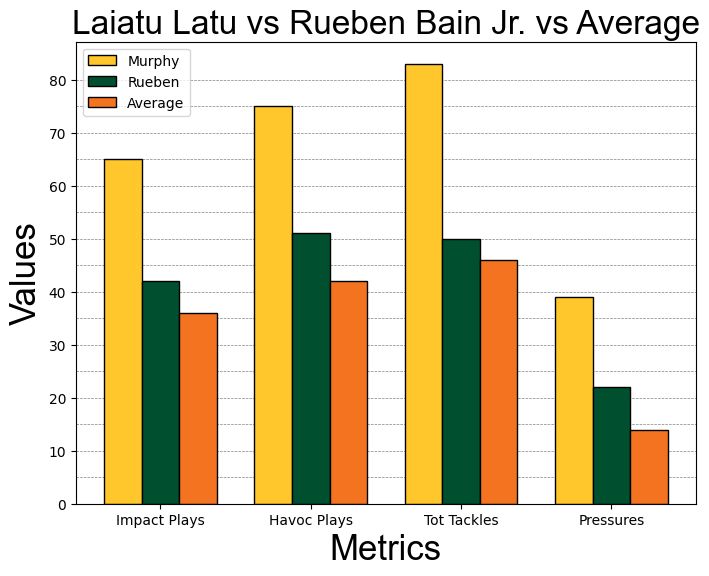

In [15]:
## Laiatu Latu Bar Graph
labels = ['Impact Plays', 'Havoc Plays', 'Tot Tackles', 'Pressures']
player_values = np.array([65, 75, 83, 39])
rueben_values = np.array([42, 51, 50, 22])
avg_values = np.array([36, 42, 46, 14])

plt.figure(figsize=(8,6))

## Labeling and arranging
width = 0.25
x = np.arange(len(labels))

plt.xlabel('Metrics', fontdict={'fontname' : 'Arial', 'fontsize': 25})
plt.ylabel('Values', fontdict={'fontname' : 'Arial', 'fontsize': 25})
plt.title('Laiatu Latu vs Rueben Bain Jr. vs Average', fontdict={'fontname' : 'Arial', 'fontsize': 24})
plt.xticks(x, labels)

## Plotting
plt.bar(x - width, player_values, color='#FFC72C', edgecolor='black', width=width, label='Murphy')
plt.bar(x, rueben_values, color='#005030', edgecolor='black', width=width, label='Rueben') 
plt.bar(x + width, avg_values, color='#F47321', edgecolor='black', width=width, label='Average')

## Grid Lines
for y in np.arange(0, max(max(player_values), max(rueben_values), max(avg_values)), 5):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5, zorder=0)

plt.legend(loc=2)

plt.show()

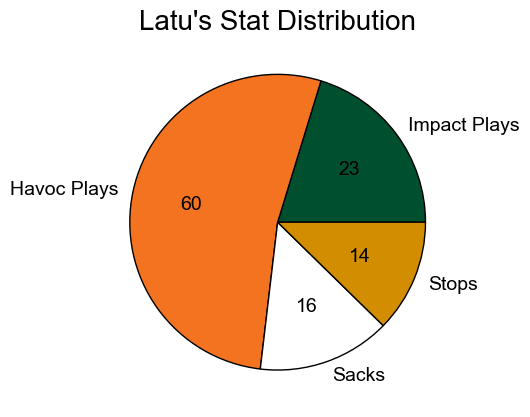

In [10]:
## Laiatu Latu Pie Chart
impact_plays = 23
havoc_plays = 60
sacks = 16.5
stops = 14
values = [impact_plays, havoc_plays, sacks, stops]
color = ['#005030', '#F47321', '#FFFFFF', '#d28e00']
labels = ['Impact Plays', 'Havoc Plays', 'Sacks', 'Stops']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct


plt.pie(values, labels=labels, colors=color, wedgeprops={'edgecolor': 'black'}, autopct=make_autopct(values), textprops={'fontname' : 'Arial', 'fontsize': 14})

plt.title("Latu's Stat Distribution", fontdict={'fontname' : 'Arial', 'fontsize': 20})

plt.show()

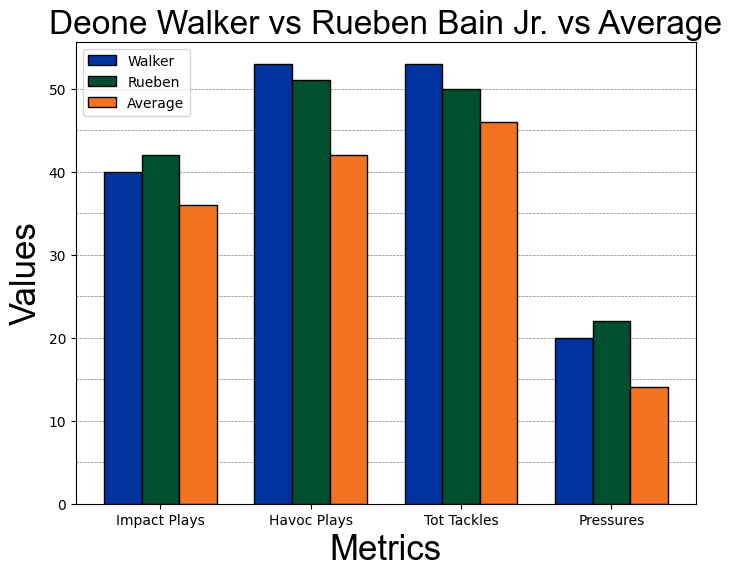

In [19]:
## Deone Walker Bar Graph
labels = ['Impact Plays', 'Havoc Plays', 'Tot Tackles', 'Pressures']
player_values = np.array([40, 53, 53, 20])
rueben_values = np.array([42, 51, 50, 22])
avg_values = np.array([36, 42, 46, 14])

plt.figure(figsize=(8,6))

## Labeling and arranging
width = 0.25
x = np.arange(len(labels))

plt.xlabel('Metrics', fontdict={'fontname' : 'Arial', 'fontsize': 25})
plt.ylabel('Values', fontdict={'fontname' : 'Arial', 'fontsize': 25})
plt.title('Deone Walker vs Rueben Bain Jr. vs Average', fontdict={'fontname' : 'Arial', 'fontsize': 24})
plt.xticks(x, labels)

## Plotting
plt.bar(x - width, player_values, color='#0033A0', edgecolor='black', width=width, label='Walker')
plt.bar(x, rueben_values, color='#005030', edgecolor='black', width=width, label='Rueben') 
plt.bar(x + width, avg_values, color='#F47321', edgecolor='black', width=width, label='Average')

## Grid Lines
for y in np.arange(0, max(max(player_values), max(rueben_values), max(avg_values)), 5):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5, zorder=0)

plt.legend(loc=2)

plt.show()

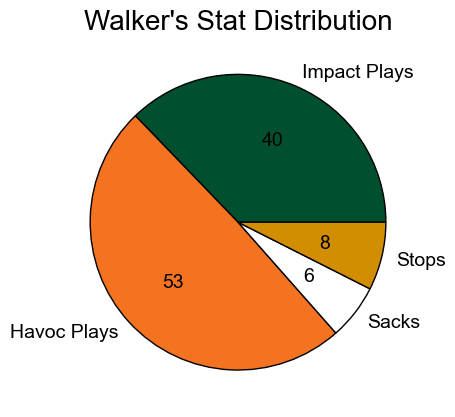

In [11]:
## Deone Walker Pie Chart
impact_plays = 40
havoc_plays = 53
sacks = 6.5
stops = 8
values = [impact_plays, havoc_plays, sacks, stops]
color = ['#005030', '#F47321', '#FFFFFF', '#d28e00']
labels = ['Impact Plays', 'Havoc Plays', 'Sacks', 'Stops']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct


plt.pie(values, labels=labels, colors=color, wedgeprops={'edgecolor': 'black'}, autopct=make_autopct(values), textprops={'fontname' : 'Arial', 'fontsize': 14})

plt.title("Walker's Stat Distribution", fontdict={'fontname' : 'Arial', 'fontsize': 20})

plt.show()

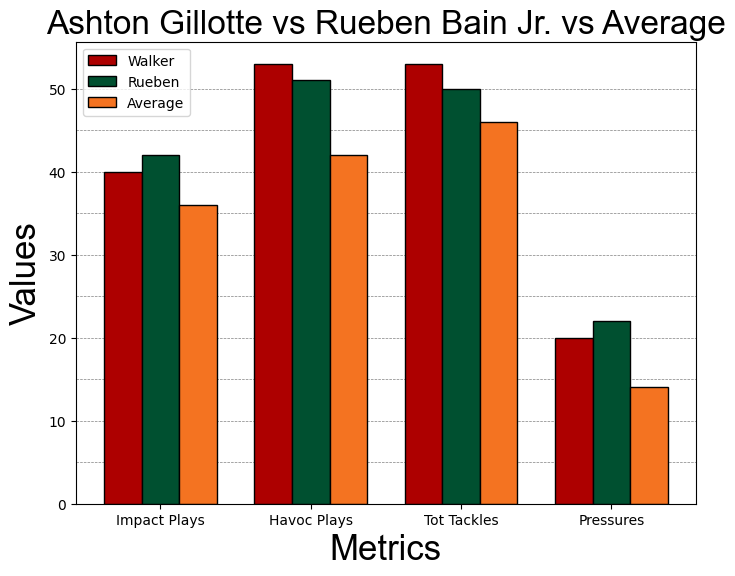

In [20]:
## Ashton Gillotte Bar Graph
labels = ['Impact Plays', 'Havoc Plays', 'Tot Tackles', 'Pressures']
player_values = np.array([40, 53, 53, 20])
rueben_values = np.array([42, 51, 50, 22])
avg_values = np.array([36, 42, 46, 14])

plt.figure(figsize=(8,6))

## Labeling and arranging
width = 0.25
x = np.arange(len(labels))

plt.xlabel('Metrics', fontdict={'fontname' : 'Arial', 'fontsize': 25})
plt.ylabel('Values', fontdict={'fontname' : 'Arial', 'fontsize': 25})
plt.title('Ashton Gillotte vs Rueben Bain Jr. vs Average', fontdict={'fontname' : 'Arial', 'fontsize': 24})
plt.xticks(x, labels)

## Plotting
plt.bar(x - width, player_values, color='#AD0000', edgecolor='black', width=width, label='Walker')
plt.bar(x, rueben_values, color='#005030', edgecolor='black', width=width, label='Rueben') 
plt.bar(x + width, avg_values, color='#F47321', edgecolor='black', width=width, label='Average')

## Grid Lines
for y in np.arange(0, max(max(player_values), max(rueben_values), max(avg_values)), 5):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5, zorder=0)

plt.legend(loc=2)

plt.show()

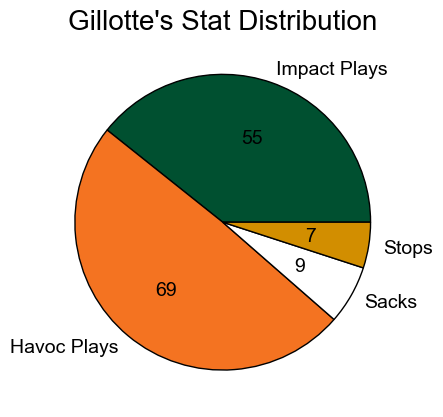

In [12]:
## Ashton Gillotte Pie Chart
impact_plays = 55
havoc_plays = 69
sacks = 9
stops = 7
values = [impact_plays, havoc_plays, sacks, stops]
color = ['#005030', '#F47321', '#FFFFFF', '#d28e00']
labels = ['Impact Plays', 'Havoc Plays', 'Sacks', 'Stops']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct


plt.pie(values, labels=labels, colors=color, wedgeprops={'edgecolor': 'black'}, autopct=make_autopct(values), textprops={'fontname' : 'Arial', 'fontsize': 14})

plt.title("Gillotte's Stat Distribution", fontdict={'fontname' : 'Arial', 'fontsize': 20})

plt.show()